In [1]:
from __future__ import print_function
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input,UpSampling2D
#from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.layers import merge
#keras.layers.Concatenate
#from keras.layers import Concatenate
from keras.layers import Reshape
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/apiiit-rkv/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/apiiit-rkv/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/apiiit-rkv/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/apiiit-rkv/anaconda3/lib/python3.7/sit

In [6]:
data_path1 = '/home/apiiit-rkv/Desktop/tot/tottrain/dog/'

In [7]:

imgs1 = np.empty((256, 256), int)
filenames = sorted(os.listdir(data_path1))
p1=0
for img_name in filenames:
    img = plt.imread(data_path1 + img_name)
    img  = np.resize(img, (256, 256))
    if p1==0:
      imgs1=(img)
      p1=1
    else:
      imgs1 = np.append(imgs1, img, axis=0)
print(imgs1.shape)

(30720, 256)


In [8]:
imgs1 = np.reshape(imgs1, [ 120, 256, 256])

In [9]:
train_images1, test_images1 = train_test_split(imgs1,test_size=0.20, random_state=42)

In [10]:
print(train_images1.shape)
print(test_images1.shape)

(96, 256, 256)
(24, 256, 256)


In [11]:
nRows1,nCols1 = train_images1.shape[1:]
nDims1 = nRows1

In [12]:
train_data1 = train_images1.reshape(train_images1.shape[0], nRows1, nCols1, 1)
test_data1 = test_images1.reshape(test_images1.shape[0], nRows1, nCols1, 1)

In [13]:
input_shape1 = (nRows1, nCols1, 1)
train_data1 = train_data1.astype('float32')
test_data1 = test_data1.astype('float32')

print(input_shape1)

(256, 256, 1)


In [14]:
train_data1 /= 255
test_data1 /= 255


In [15]:
def encoder1(input_shape):
    x = Conv2D(16,(3,3), activation='relu', padding='same')(input_shape)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
    encoded1 = MaxPooling2D((2,2), padding='same', name='encoder')(x)
    return encoded1
def decoder1(input_shape):
    encoded=encoder1(input_shape)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded1 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded1
    #model.add(BatchNormalization(axis=-1))
    #decode=model.add(Activation('relu'))
print ('Starting auto1')
input_shape = Input(shape = [256,256,1])
model1 = Model(input_shape,decoder1(input_shape))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Starting autoencoder')
model1.summary()


Starting auto1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Starting autoencoder
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 8)         584   

In [16]:
batch_size = 2
epochs = 1
history = model1.fit(train_data1,train_data1,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_data1, test_data1))
model1.evaluate(test_data1, test_data1,verbose=0)


Train on 96 samples, validate on 24 samples
Epoch 1/1
96/96 [==============================] - 11s 120ms/step - loss: 0.6917 - accuracy: 0.0045 - val_loss: 0.6884 - val_accuracy: 0.0046


[0.6884292960166931, 0.004611968994140625]

In [17]:
data_path2 = '/home/apiiit-rkv/Desktop/tot/tottrain1/horse/'

In [18]:
imgs2 = np.empty((256, 256), int)
filenames = sorted(os.listdir(data_path2))
p2=0
for img_name in filenames:
    img = plt.imread(data_path2 + img_name)
    img  = np.resize(img, (256, 256))
    if p2==0:
      imgs2=(img)
      p2=1
    else:
      imgs2 = np.append(imgs2, img, axis=0)
print(imgs2.shape)

(30720, 256)


In [19]:
imgs2 = np.reshape(imgs2, [ 120, 256, 256])
train_images2, test_images2 = train_test_split(imgs2, test_size=0.33, random_state=42)
nRows2,nCols2 = train_images2.shape[1:]
nDims2 = nRows2
train_data2 = train_images2.reshape(train_images2.shape[0], nRows2, nCols2, 1)
test_data2 = test_images2.reshape(test_images2.shape[0], nRows2, nCols2, 1)
input_shape2 = (nRows2, nCols2, 1)
train_data2 = train_data2.astype('float32')
test_data2 = test_data2.astype('float32')
train_data2 /= 255
test_data2 /= 255

In [20]:
def encoder2(input_shape):
    x = Conv2D(16,(3,3), activation='relu', padding='same')(input_shape)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
    encoded2 = MaxPooling2D((2,2), padding='same', name='encoder0')(x)
    return encoded2
def decoder2(input_shape):
    encoded=encoder2(input_shape)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded2 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded2
    #model.add(BatchNormalization(axis=-1))
    #decode=model.add(Activation('relu'))
print ('Starting auto2')
input_shape = Input(shape = [256,256,1])
model2 = Model(input_shape,decoder2(input_shape))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Starting autoencoder')
model2.summary()


Starting auto2
Starting autoencoder
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
encoder0 (MaxPooling2D)

In [21]:
data_path3 = '/home/apiiit-rkv/Desktop/tot/tottrain2/cat/'

In [22]:
imgs3 = np.empty((256, 256), int)
filenames = sorted(os.listdir(data_path3))
p3=0
for img_name in filenames:
    img = plt.imread(data_path3 + img_name)
    img  = np.resize(img, (256, 256))
    if p3==0:
      imgs3=(img)
      p3=1
    else:
      imgs3 = np.append(imgs3, img, axis=0)
print(imgs3.shape)

(30720, 256)


In [23]:
imgs3 = np.reshape(imgs3, [ 120, 256, 256])

In [24]:
train_images3, test_images3 = train_test_split(imgs3,test_size=0.20, random_state=42)

In [25]:
print(train_images3.shape)
print(test_images3.shape)

(96, 256, 256)
(24, 256, 256)


In [26]:
nRows3,nCols3 = train_images3.shape[1:]
nDims3 = nRows3

In [27]:
train_data3 = train_images3.reshape(train_images3.shape[0], nRows1, nCols1, 1)
test_data3 = test_images3.reshape(test_images3.shape[0], nRows1, nCols1, 1)

In [28]:
input_shape3 = (nRows3, nCols3, 1)
train_data3 = train_data1.astype('float32')
test_data3 = test_data1.astype('float32')

print(input_shape3)

(256, 256, 1)


In [29]:
train_data3 /= 255
test_data3 /= 255


In [30]:
def encoder3(input_shape):
    x = Conv2D(16,(3,3), activation='relu', padding='same',name='7')(input_shape)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same',name='8')(x)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same',name='9')(x)
    encoded3 = MaxPooling2D((2,2), padding='same', name='encoder3')(x)
    return encoded3
def decoder3(input_shape):
    encoded=encoder3(input_shape)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded3 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded3
    #model.add(BatchNormalization(axis=-1))
    #decode=model.add(Activation('relu'))
print ('Starting auto3')
input_shape = Input(shape = [256,256,1])
model3 = Model(input_shape,decoder3(input_shape))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Starting autoencoder')
model3.summary()

Starting auto3
Starting autoencoder
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
7 (Conv2D)                   (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
8 (Conv2D)                   (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
9 (Conv2D)                   (None, 64, 64, 8)         584       
_________________________________________________________________
encoder3 (MaxPooling2D)

In [31]:
data_path4 = '/home/apiiit-rkv/Desktop/tot/tottrain3/elephant/'

In [32]:
imgs4 = np.empty((256, 256), int)
filenames = sorted(os.listdir(data_path4))
p4=0
for img_name in filenames:
    img = plt.imread(data_path4 + img_name)
    img  = np.resize(img, (256, 256))
    if p4==0:
      imgs4=(img)
      p4=1
    else:
      imgs4 = np.append(imgs4, img, axis=0)
print(imgs4.shape)

(30720, 256)


In [33]:
imgs4 = np.reshape(imgs4, [ 120, 256, 256])

In [34]:
train_images4, test_images4 = train_test_split(imgs4,test_size=0.20, random_state=42)

In [35]:
print(train_images4.shape)
print(test_images4.shape)

(96, 256, 256)
(24, 256, 256)


In [36]:
nRows4,nCols4 = train_images4.shape[1:]
nDims4 = nRows4

In [37]:
train_data4 = train_images4.reshape(train_images4.shape[0], nRows1, nCols1, 1)
test_data4 = test_images4.reshape(test_images4.shape[0], nRows1, nCols1, 1)

In [38]:
input_shape4 = (nRows4, nCols4, 1)
train_data4 = train_data4.astype('float32')
test_data4 = test_data4.astype('float32')

print(input_shape4)

(256, 256, 1)


In [39]:
train_data4 /= 255
test_data4 /= 255


In [40]:
def encoder4(input_shape):
    x = Conv2D(16,(3,3), activation='relu', padding='same',name='17')(input_shape)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same',name='18')(x)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same',name='19')(x)
    encoded4 = MaxPooling2D((2,2), padding='same', name='encoder4')(x)
    return encoded4
def decoder4(input_shape):
    encoded=encoder4(input_shape)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded4
    #model.add(BatchNormalization(axis=-1))
    #decode=model.add(Activation('relu'))
print ('Starting auto4')
input_shape = Input(shape = [256,256,1])
model4 = Model(input_shape,decoder4(input_shape))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Starting autoencoder')
model4.summary()

Starting auto4
Starting autoencoder
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
17 (Conv2D)                  (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
18 (Conv2D)                  (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
19 (Conv2D)                  (None, 64, 64, 8)         584       
_________________________________________________________________
encoder4 (MaxPooling2D)

In [41]:
data_path5 = '/home/apiiit-rkv/Desktop/tot/tottrain4/squirrel/'

In [42]:
imgs5 = np.empty((256, 256), int)
filenames = sorted(os.listdir(data_path5))
p5=0
for img_name in filenames:
    img = plt.imread(data_path5 + img_name)
    img  = np.resize(img, (256, 256))
    if p5==0:
      imgs5=(img)
      p5=1
    else:
      imgs5 = np.append(imgs5, img, axis=0)
print(imgs5.shape)

(30720, 256)


In [43]:
imgs5 = np.reshape(imgs5, [ 120, 256, 256])

In [44]:
train_images5, test_images5 = train_test_split(imgs5,test_size=0.20, random_state=42)

In [45]:
print(train_images5.shape)
print(test_images5.shape)

(96, 256, 256)
(24, 256, 256)


In [47]:
nRows5,nCols5 = train_images5.shape[1:]
nDims5 = nRows5

In [48]:
train_data5 = train_images5.reshape(train_images5.shape[0], nRows1, nCols1, 1)
test_data5 = test_images5.reshape(test_images5.shape[0], nRows1, nCols1, 1)

In [49]:
input_shape5 = (nRows5, nCols5, 1)
train_data5 = train_data5.astype('float32')
test_data5 = test_data5.astype('float32')

print(input_shape3)
train_data3 /= 255
test_data3 /= 255

(256, 256, 1)


In [50]:
def encoder5(input_shape):
    x = Conv2D(16,(3,3), activation='relu', padding='same',name='71')(input_shape)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same',name='81')(x)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same',name='91')(x)
    encoded5 = MaxPooling2D((2,2), padding='same', name='encoder5')(x)
    return encoded5
def decoder5(input_shape):
    encoded=encoder5(input_shape)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded5 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded5
    #model.add(BatchNormalization(axis=-1))
    #decode=model.add(Activation('relu'))
print ('Starting auto5')
input_shape = Input(shape = [256,256,1])
model5 = Model(input_shape,decoder5(input_shape))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Starting autoencoder')
model5.summary()

Starting auto5
Starting autoencoder
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
71 (Conv2D)                  (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
81 (Conv2D)                  (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
91 (Conv2D)                  (None, 64, 64, 8)         584       
_________________________________________________________________
encoder5 (MaxPooling2D)

In [52]:
a=Flatten()(encoder1(input_shape))
b=Flatten()(encoder2(input_shape))
c=Flatten()(encoder3(input_shape))
d=Flatten()(encoder4(input_shape))
e=Flatten()(encoder5(input_shape))

In [72]:
a

<tf.Tensor 'flatten_5/Reshape:0' shape=(None, None) dtype=float32>

In [53]:
merged_model1 = keras.layers.concatenate([a,b,c,d,e],axis=0)
def final(merged_model1):
    #merged_model=Dense(512, activation='relu')(merged_model1)
    merged_model=Dense(256, activation='relu')(merged_model1)
    merged_model=Dense(128, activation='relu')(merged_model)
    merged_model=Dropout(0.2)(merged_model)
    merged_model=Dense(5, activation='softmax')(merged_model)
    return merged_model

In [54]:
z=final(merged_model1)
final_model=Model(input_shape,final(merged_model1))

In [55]:
final_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 256, 256, 16) 160         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 256, 256, 16) 160         input_5[0][0]                    
__________________________________________________________________________________________________
7 (Conv2D)                      (None, 256, 256, 16) 160         input_5[0][0]                    
____________________________________________________________________________________________

In [56]:
data_path6 = '/home/apiiit-rkv/Desktop/TRAIN/'

In [57]:
import numpy as np
import os
import matplotlib.pyplot as plt
imgs6 = np.empty((256, 256), int)
filenames = sorted(os.listdir(data_path6))
p6=0
d6=[]
for img_name in filenames:
    img = plt.imread(data_path6 + img_name)
    img  = np.resize(img, (256, 256))
    if p6==0:
      imgs6=(img)
      p6=1
    else:
      imgs6 = np.append(imgs6, img, axis=0)
    res = img_name[:3]
    d6.append(res)
print(d6)
    
print(imgs6.shape)
        
img_data = np.array(imgs6)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

['OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'OIP', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat'

(153600, 256)

In [58]:
imgs6 = np.reshape(imgs6, [ 600, 256, 256])
train_images, test_images = train_test_split(imgs6,test_size=0.20, random_state=42)
nRows,nCols = train_images.shape[1:]
nDims = nRows
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(train_images.shape)
print(test_images.shape)

(480, 256, 256)
(120, 256, 256)


In [59]:
import numpy as np
imgs = np.reshape(imgs6, [ 600, 256, 256])
train_images, test_images, train_labels, test_labels = train_test_split(imgs6, d6, test_size=0.20, random_state=42)
print('Training data shape : ', train_images.shape, len(train_labels))
print('Testing data shape : ', test_images.shape, len(test_labels))
classes = np.unique(train_labels)
classes=np.append(classes,0)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (480, 256, 256) 480
Testing data shape :  (120, 256, 256) 120
Total number of outputs :  9
Output classes :  ['OIP' 'cat' 'dog' 'e03' 'e13' 'e83' 'ea3' 'hor' '0']


(256, 256)


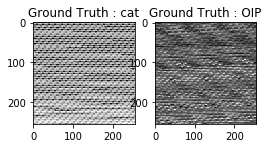

In [60]:
plt.figure(figsize=[4,2])
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
print(train_images.shape[1:])

In [61]:
train_labels

['cat',
 'OIP',
 'e83',
 'hor',
 'cat',
 'cat',
 'hor',
 'dog',
 'hor',
 'ea3',
 'OIP',
 'hor',
 'cat',
 'cat',
 'ea3',
 'cat',
 'OIP',
 'OIP',
 'dog',
 'OIP',
 'OIP',
 'cat',
 'cat',
 'OIP',
 'hor',
 'OIP',
 'e83',
 'e83',
 'OIP',
 'OIP',
 'hor',
 'hor',
 'dog',
 'dog',
 'hor',
 'dog',
 'OIP',
 'e83',
 'OIP',
 'OIP',
 'e13',
 'cat',
 'OIP',
 'e83',
 'dog',
 'cat',
 'dog',
 'dog',
 'hor',
 'e03',
 'dog',
 'dog',
 'hor',
 'e83',
 'cat',
 'OIP',
 'hor',
 'OIP',
 'OIP',
 'dog',
 'OIP',
 'dog',
 'hor',
 'ea3',
 'e83',
 'e83',
 'e83',
 'ea3',
 'e83',
 'dog',
 'hor',
 'hor',
 'OIP',
 'cat',
 'e83',
 'dog',
 'ea3',
 'dog',
 'hor',
 'cat',
 'cat',
 'e83',
 'ea3',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'ea3',
 'hor',
 'hor',
 'hor',
 'OIP',
 'cat',
 'cat',
 'dog',
 'OIP',
 'hor',
 'OIP',
 'cat',
 'ea3',
 'OIP',
 'dog',
 'dog',
 'ea3',
 'dog',
 'dog',
 'OIP',
 'dog',
 'OIP',
 'e83',
 'cat',
 'hor',
 'hor',
 'OIP',
 'e83',
 'dog',
 'e83',
 'dog',
 'hor',
 'e83',
 'e83',
 'cat',
 'cat',


In [62]:
print(train_labels)
#train_labels= [0 if i =='hor' else 1 if i =='dog' else 2 for i in train_labels]
train_labels= [0 if i =='hor' else 1 if i =='dog' else 2 if i == 'cat' else 3 if i == 'OIP' else 4 for i in train_labels]
print(train_labels)

['cat', 'OIP', 'e83', 'hor', 'cat', 'cat', 'hor', 'dog', 'hor', 'ea3', 'OIP', 'hor', 'cat', 'cat', 'ea3', 'cat', 'OIP', 'OIP', 'dog', 'OIP', 'OIP', 'cat', 'cat', 'OIP', 'hor', 'OIP', 'e83', 'e83', 'OIP', 'OIP', 'hor', 'hor', 'dog', 'dog', 'hor', 'dog', 'OIP', 'e83', 'OIP', 'OIP', 'e13', 'cat', 'OIP', 'e83', 'dog', 'cat', 'dog', 'dog', 'hor', 'e03', 'dog', 'dog', 'hor', 'e83', 'cat', 'OIP', 'hor', 'OIP', 'OIP', 'dog', 'OIP', 'dog', 'hor', 'ea3', 'e83', 'e83', 'e83', 'ea3', 'e83', 'dog', 'hor', 'hor', 'OIP', 'cat', 'e83', 'dog', 'ea3', 'dog', 'hor', 'cat', 'cat', 'e83', 'ea3', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'ea3', 'hor', 'hor', 'hor', 'OIP', 'cat', 'cat', 'dog', 'OIP', 'hor', 'OIP', 'cat', 'ea3', 'OIP', 'dog', 'dog', 'ea3', 'dog', 'dog', 'OIP', 'dog', 'OIP', 'e83', 'cat', 'hor', 'hor', 'OIP', 'e83', 'dog', 'e83', 'dog', 'hor', 'e83', 'e83', 'cat', 'cat', 'dog', 'hor', 'ea3', 'cat', 'OIP', 'OIP', 'OIP', 'cat', 'hor', 'OIP', 'OIP', 'dog', 'cat', 'OIP', 'dog', 'dog', 'dog', 'hor'

In [63]:
print(test_labels)
#train_labels= [0 if i =='hor' else 1 if i =='dog' else 2 for i in train_labels]
test_labels= [0 if i =='hor' else 1 if i =='dog' else 2 if i == 'cat' else 3 if i == 'OIP' else 4 for i in test_labels]
print(test_labels)

['OIP', 'e83', 'hor', 'OIP', 'cat', 'dog', 'OIP', 'ea3', 'OIP', 'dog', 'OIP', 'OIP', 'OIP', 'hor', 'e83', 'cat', 'OIP', 'cat', 'cat', 'OIP', 'OIP', 'hor', 'hor', 'hor', 'e83', 'hor', 'OIP', 'cat', 'hor', 'e83', 'hor', 'cat', 'OIP', 'dog', 'cat', 'ea3', 'cat', 'hor', 'e83', 'dog', 'e13', 'OIP', 'hor', 'hor', 'OIP', 'cat', 'ea3', 'OIP', 'OIP', 'hor', 'dog', 'dog', 'OIP', 'hor', 'hor', 'dog', 'cat', 'cat', 'cat', 'cat', 'OIP', 'cat', 'dog', 'hor', 'hor', 'OIP', 'hor', 'hor', 'OIP', 'dog', 'dog', 'OIP', 'e83', 'e83', 'e83', 'hor', 'dog', 'cat', 'hor', 'e83', 'dog', 'e83', 'hor', 'e13', 'OIP', 'OIP', 'cat', 'cat', 'e83', 'cat', 'cat', 'hor', 'OIP', 'dog', 'dog', 'dog', 'cat', 'OIP', 'e83', 'OIP', 'OIP', 'cat', 'hor', 'dog', 'OIP', 'e83', 'cat', 'dog', 'dog', 'e83', 'cat', 'ea3', 'hor', 'hor', 'e83', 'e83', 'dog', 'cat', 'hor', 'e83']
[3, 4, 0, 3, 2, 1, 3, 4, 3, 1, 3, 3, 3, 0, 4, 2, 3, 2, 2, 3, 3, 0, 0, 0, 4, 0, 3, 2, 0, 4, 0, 2, 3, 1, 2, 4, 2, 0, 4, 1, 4, 3, 0, 0, 3, 2, 4, 3, 3, 0, 1, 1, 3,

In [64]:
from keras.utils import to_categorical

nRows,nCols = train_images.shape[1:]
nDims = nRows
print(nCols)
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(len(train_labels))
print(len(test_labels))
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print('Original label : ', train_labels[11])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[11])
print('Original label : ', test_labels[11])
print('After conversion to categorical ( one-hot ) : ', test_labels_one_hot[11])

256
480
120
Original label :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0. 0. 0.]
Original label :  3
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1. 0.]


In [65]:
from keras import optimizers
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
final_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [66]:
history = final_model.fit(train_data,train_labels_one_hot,batch_size=1,epochs=10,verbose=1,validation_data=(test_data, test_labels_one_hot))

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 98s 204ms/step - loss: 0.5129 - accuracy: 0.7994 - val_loss: 0.4993 - val_accuracy: 0.8000
Epoch 2/10
480/480 [==============================] - 98s 204ms/step - loss: 0.4967 - accuracy: 0.7996 - val_loss: 0.4927 - val_accuracy: 0.8013
Epoch 3/10
480/480 [==============================] - 97s 201ms/step - loss: 0.4792 - accuracy: 0.8053 - val_loss: 0.4663 - val_accuracy: 0.8120
Epoch 4/10
480/480 [==============================] - 100s 208ms/step - loss: 0.4534 - accuracy: 0.8111 - val_loss: 0.4724 - val_accuracy: 0.8047
Epoch 5/10
480/480 [==============================] - 97s 203ms/step - loss: 0.4358 - accuracy: 0.8172 - val_loss: 0.4644 - val_accuracy: 0.8180
Epoch 6/10
480/480 [==============================] - 101s 209ms/step - loss: 0.4039 - accuracy: 0.8266 - val_loss: 0.4625 - val_accuracy: 0.8157
Epoch 7/10
480/480 [==============================] - 98s 205ms/step - loss: 0.358

In [67]:
img='/home/apiiit-rkv/Desktop/h1.jpg'

In [68]:
imgs0 = np.empty((256, 256), int)
img = plt.imread('/home/apiiit-rkv/Desktop/d1.jpeg')
img  = np.resize(img, (256, 256))
#imgs0=img
#print(imgs0.shape)
#imgs0 = np.reshape(imgs0, [ 1, 256, 256])
#print(imgs0.shape)
#imgs0.shape[0]
fin = img.reshape(1, 256, 256, 1)

In [70]:
prediction=final_model.predict(fin,batch_size=None,steps=1)

In [71]:
prediction

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 6.9325376e-30, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00]], dtype=float32)